# Week 2

## Data manipulation and visualization with python

Alexander Goncearenco

### What are the keystones of Data Analysis

* Formulating Questions

* Data wrangling: gather, access, clean, tranform

* Exploratory data analysis

* Making conclusions and predictions: modeling, machine learning

* Reporting and communication

### Working with data in Python

Data types and data structures - 
containers to hold, access and modify data efficiently.

Our options:
- Python built-in data types
- Python built-in data structures and functions
- Python packages extend the built-in capabilities (packages in standard library and pip)
- 3rd party (non-pythonic) tools that we can run from Python

### Built-in data types, structures and functions

* int, float, complex, bool
* dict, list, set and frozenset, tuple, str, bytes
* https://docs.python.org/3/library/stdtypes.html
* https://docs.python.org/3/library/datatypes.html


### List

In [1]:
a = [1,2,3,4,5]
print(a[0])
print(a[-1])

1
5


In [3]:
print(a[:])
print(a[:3], a[3:])
print(a[0:3], a[3:5])

[1, 2, 3, 4, 5]
[1, 2, 3] [4, 5]
[1, 2, 3] [4, 5]


In [5]:
print(a[slice(0, 3)])
print(type(a[1:2]))
print(type(slice(0, 3)))

[1, 2, 3]
<class 'list'>
<class 'slice'>


In [ ]:
print(a[::2])

In [ ]:
del a[::2]
print(a)

In [7]:
from math import sin
print([sin(x) for x in range(4)])

[0.0, 0.8414709848078965, 0.9092974268256817, 0.1411200080598672]


In [8]:
list(map(sin, range(4)))

[0.0, 0.8414709848078965, 0.9092974268256817, 0.1411200080598672]

In [ ]:
a.append(6)
a

In [ ]:
a.extend(a)
a

### Arrays in Python

* list
* array 1-dimensional https://docs.python.org/3/library/array.html
* numpy supports multidimensional arrays

In [10]:
from array import array
from statistics import mean

al = array('l', [1, 2, 3, 4, 5])
print(al)
print(sum(al), mean(al))

array('l', [1, 2, 3, 4, 5])
15 3


In [11]:
ad = array('d', [1.0, 2.0, 3.14])
print(ad)
print(sum(ad), mean(ad))

array('d', [1.0, 2.0, 3.14])
6.140000000000001 2.046666666666667


In [12]:
# However:
print(2 * ad)

print(ad + ad)

array('d', [1.0, 2.0, 3.14, 1.0, 2.0, 3.14])
array('d', [1.0, 2.0, 3.14, 1.0, 2.0, 3.14])


### Other numeric issues

In [ ]:
0.1 + 0.1 + 0.1 == 0.3

In [ ]:
from decimal import Decimal

Decimal('0.1') + Decimal('0.1') + Decimal('0.1') == Decimal('0.3')

In [ ]:
import numpy as np

np.isclose(0.1 + 0.1 + 0.1, 0.3)

### Overview of packages

* __numpy__  - N-dimensional arrays and algebra
* __scipy__ - scientific computing (uses numpy)
* __pandas__  - data structures & analysis (uses numpy)
* __matplotlib__, __seaborn__ - plotting
* __jupyter__ - notebook, integration with pandas and plotting
* __scikit-learn (sklearn)__  - Machine learning algorithms (uses numpy and scipy)
* statistics - standard package - basic descriptive statistics
* statsmodels - statistical modeling, hypothesis testing

Make sure you know where to find documentation for these packages

### Datasets:

* https://catalog.data.gov/dataset
* http://mlr.cs.umass.edu/ml/datasets.html
* https://www.kaggle.com/datasets
* https://opendata.socrata.com


__Tabular data__: database tables, Excel, CSV


### Accessing data

* Example datasets "red wine quality"
* Download CSV from https://archive.ics.uci.edu/ml/datasets/wine+quality

In [14]:
winequality_file = "winequality-red.csv"

In [15]:
from itertools import islice

with open(winequality_file) as f:
    for line in islice(f, 0, 5):
        print(line.split(","))

# exclude header and line endings, convert to float

['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar', 'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol', 'quality\n']
['7.4', '0.7', '0.0', '1.9', '0.076', '11.0', '34.0', '0.9978', '3.51', '0.56', '9.4', '5\n']
['7.8', '0.88', '0.0', '2.6', '0.098', '25.0', '67.0', '0.9968', '3.2', '0.68', '9.8', '5\n']
['7.8', '0.76', '0.04', '2.3', '0.092', '15.0', '54.0', '0.997', '3.26', '0.65', '9.8', '5\n']
['11.2', '0.28', '0.56', '1.9', '0.075', '17.0', '60.0', '0.998', '3.16', '0.58', '9.8', '6\n']


In [16]:
# Python CSVReader
import csv

with open(winequality_file) as csvfile:
    reader = csv.reader(csvfile, delimiter=',')
    for row in islice(reader, 0, 5):
        print(', '.join(row))

fixed acidity, volatile acidity, citric acid, residual sugar, chlorides, free sulfur dioxide, total sulfur dioxide, density, pH, sulphates, alcohol, quality
7.4, 0.7, 0.0, 1.9, 0.076, 11.0, 34.0, 0.9978, 3.51, 0.56, 9.4, 5
7.8, 0.88, 0.0, 2.6, 0.098, 25.0, 67.0, 0.9968, 3.2, 0.68, 9.8, 5
7.8, 0.76, 0.04, 2.3, 0.092, 15.0, 54.0, 0.997, 3.26, 0.65, 9.8, 5
11.2, 0.28, 0.56, 1.9, 0.075, 17.0, 60.0, 0.998, 3.16, 0.58, 9.8, 6


In [19]:
# Python CSVReader
import csv

with open(winequality_file) as csvfile:
    reader = csv.DictReader(csvfile, delimiter=',')
    for row in islice(reader, 0, 3):
        print(', '.join(row.values()))
        
print(row.keys())
print(row['pH'])
# limitations - data structure is not suitable for data analysis

7.4, 0.7, 0.0, 1.9, 0.076, 11.0, 34.0, 0.9978, 3.51, 0.56, 9.4, 5
7.8, 0.88, 0.0, 2.6, 0.098, 25.0, 67.0, 0.9968, 3.2, 0.68, 9.8, 5
7.8, 0.76, 0.04, 2.3, 0.092, 15.0, 54.0, 0.997, 3.26, 0.65, 9.8, 5
odict_keys(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar', 'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol', 'quality'])
3.26


In [20]:
# Numpy: read CSV
from numpy import genfromtxt
wine_np = genfromtxt(winequality_file, delimiter=',', skip_header=1)
print(wine_np)
print(wine_np.shape)

[[  7.4     0.7     0.    ...,   0.56    9.4     5.   ]
 [  7.8     0.88    0.    ...,   0.68    9.8     5.   ]
 [  7.8     0.76    0.04  ...,   0.65    9.8     5.   ]
 ..., 
 [  6.3     0.51    0.13  ...,   0.75   11.      6.   ]
 [  5.9     0.645   0.12  ...,   0.71   10.2     5.   ]
 [  6.      0.31    0.47  ...,   0.66   11.      6.   ]]
(1599, 12)


In [24]:
# Pandas: read CSV
from pandas import read_csv
wine_df = read_csv(winequality_file, sep=',',header=0)
print(wine_df.shape)
wine_df.head()

(1599, 12)


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [27]:
# numpy array operations:
print(wine_np[0,0])  # first element
print(wine_np[0,...]) # row
print(wine_np[0,:]) # row
print(wine_np[...,0]) # column
print(wine_np[:,0]) # column

pH = wine_np[...,8]
print(pH.min(), pH.mean(), pH.max())

7.4
[  7.4      0.7      0.       1.9      0.076   11.      34.       0.9978
   3.51     0.56     9.4      5.    ]
[  7.4      0.7      0.       1.9      0.076   11.      34.       0.9978
   3.51     0.56     9.4      5.    ]
[ 7.4  7.8  7.8 ...,  6.3  5.9  6. ]
[ 7.4  7.8  7.8 ...,  6.3  5.9  6. ]
2.74 3.31111319575 4.01


In [28]:
# filtering
print(wine_np[pH < 3.2, ...])
print(wine_np[pH < 3.2, ...].shape)

[[ 11.2    0.28   0.56 ...,   0.58   9.8    6.  ]
 [  8.9    0.62   0.18 ...,   0.88   9.2    5.  ]
 [  8.9    0.62   0.19 ...,   0.93   9.2    5.  ]
 ..., 
 [  7.8    0.82   0.29 ...,   0.53   9.4    5.  ]
 [  8.4    0.37   0.43 ...,   0.81  11.2    7.  ]
 [ 11.2    0.4    0.5  ...,   0.58  10.4    5.  ]]
(349, 12)


In [29]:
import numpy as np

empty_array = np.zeros((3,4,2))
empty_array

array([[[ 0.,  0.],
        [ 0.,  0.],
        [ 0.,  0.],
        [ 0.,  0.]],

       [[ 0.,  0.],
        [ 0.,  0.],
        [ 0.,  0.],
        [ 0.,  0.]],

       [[ 0.,  0.],
        [ 0.,  0.],
        [ 0.,  0.],
        [ 0.,  0.]]])

In [ ]:
np.random.rand(3,4,2)

In [30]:
# This will ensure the random samples below can be reproduced. 
# This means the random samples will always be identical.

np.random.seed?

# learn how to invoke docstring help

In [ ]:
help(np.random.seed)

In [32]:
np.random.seed(0)
print(np.random.rand(3))

np.random.seed(0)
print(np.random.rand(3))
print(np.random.rand(3))

np.random.seed(1000)
print(np.random.rand(3))

[ 0.5488135   0.71518937  0.60276338]
[ 0.5488135   0.71518937  0.60276338]
[ 0.54488318  0.4236548   0.64589411]
[ 0.65358959  0.11500694  0.95028286]


In [ ]:
wine_np[0:3, 8]  # pH values for 3 first wines in the array

In [ ]:
# changing values
wine_np[0:3, 8] = [3., 3., 3.]
wine_np[0:3, 8]

In [35]:
wine_np.dtype.name

# change it with wine_np.astype(int)

'float64'

In [34]:
print(pH)
print(2*pH)
print(pH + pH)
print(np.exp(pH))

[ 3.51  3.2   3.26 ...,  3.42  3.57  3.39]
[ 7.02  6.4   6.52 ...,  6.84  7.14  6.78]
[ 7.02  6.4   6.52 ...,  6.84  7.14  6.78]
[ 33.44826778  24.5325302   26.04953714 ...,  30.56941502  35.51659315
  29.66595227]


In [36]:
M = wine_np[0:2, 0:3]
print(M)
print()
print(M.T)

[[ 7.4   0.7   0.  ]
 [ 7.8   0.88  0.  ]]

[[ 7.4   7.8 ]
 [ 0.7   0.88]
 [ 0.    0.  ]]


In [ ]:
M.dot(M.T) # matrix multiplication

In [ ]:
M.T.dot(M) # matrix multiplication

In [ ]:
x = np.array([3,3,3])
M*x  # multiply rows by x. This is a broadcasting operation

### Broadcasting in numpy:
 - The last dimension of each array is compared.
 - If the dimension lengths are equal, or one of the dimensions is of length 1, then we keep going.
 - If the dimension lengths are not equal, and none of the dimensions have length 1, then there's an error.
 - Continue checking dimensions until the shortest array is out of dimensions.

In [ ]:
M.dot(x) # matrix multiplication

In [ ]:
# but not this:
x.dot(M)  # try to fix it

In [37]:
print(type(wine_np)) # ndarray object
print(wine_np.shape) # note, shape is attribute
wine_np.sum()  # sum() is method

<class 'numpy.ndarray'>
(1599, 12)


152084.78193999999

In [38]:
wine_np.sum(axis=0)  # collapsed dimensions

array([ 13303.1    ,    843.985  ,    433.29   ,   4059.55   ,
          139.859  ,  25384.     ,  74302.     ,   1593.79794,
         5294.47   ,   1052.38   ,  16666.35   ,   9012.     ])

In [39]:
wine_np.sum(axis=1)

array([  74.5438 ,  123.0548 ,   99.699  , ...,  100.48174,  105.21547,
         92.49249])

In [40]:
# Pandas Dataframe (as in R)
wine_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
fixed acidity           1599 non-null float64
volatile acidity        1599 non-null float64
citric acid             1599 non-null float64
residual sugar          1599 non-null float64
chlorides               1599 non-null float64
free sulfur dioxide     1599 non-null float64
total sulfur dioxide    1599 non-null float64
density                 1599 non-null float64
pH                      1599 non-null float64
sulphates               1599 non-null float64
alcohol                 1599 non-null float64
quality                 1599 non-null int64
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [41]:
wine_df.dtypes

fixed acidity           float64
volatile acidity        float64
citric acid             float64
residual sugar          float64
chlorides               float64
free sulfur dioxide     float64
total sulfur dioxide    float64
density                 float64
pH                      float64
sulphates               float64
alcohol                 float64
quality                   int64
dtype: object

In [42]:
wine_df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [43]:
wine_df['pH'].head()

0    3.51
1    3.20
2    3.26
3    3.16
4    3.51
Name: pH, dtype: float64

In [44]:
wine_df['pH'].head(10)

0    3.51
1    3.20
2    3.26
3    3.16
4    3.51
5    3.51
6    3.30
7    3.39
8    3.36
9    3.35
Name: pH, dtype: float64

In [45]:
wine_df['pH'][:5]

0    3.51
1    3.20
2    3.26
3    3.16
4    3.51
Name: pH, dtype: float64

In [61]:
wine_df[:5]

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [ ]:
wine_df[:5]['pH']

In [99]:
wine_df[:5][['chlorides', 'pH']]

,chlorides,pH
0,0.076,3.51
1,0.098,3.20
2,0.092,3.26
3,0.075,3.16
4,0.076,3.51


In [100]:
wine_df[['chlorides', 'pH']][:5]

,chlorides,pH
0,0.076,3.51
1,0.098,3.20
2,0.092,3.26
3,0.075,3.16
4,0.076,3.51


In [47]:
wine_df['quality'].unique()

array([5, 6, 7, 4, 8, 3])

In [52]:
wine_df['quality'].nunique()

6

In [50]:
# a histogram by quality
wine_df['quality'].value_counts()

5    681
6    638
7    199
4     53
8     18
3     10
Name: quality, dtype: int64

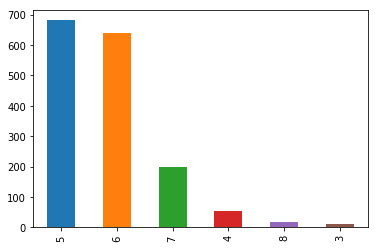

In [49]:
%matplotlib inline
wine_df['quality'].value_counts().plot(kind='bar')

In [ ]:
wine_df['quality'] == 3
# This is a big array of Trues and Falses, one for each row in our dataframe. When we index our dataframe with this array, we get just the rows where.

In [53]:
# You can also combine more than one condition with the & operator like this:
bad_wine = wine_df['quality'] == 3
acidic_wine = wine_df['pH'] < 3.3

wine_df[bad_wine & acidic_wine]

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
459,11.6,0.58,0.66,2.2,0.074,10.0,47.0,1.0008,3.25,0.57,9.0,3
517,10.4,0.61,0.49,2.1,0.200,5.0,16.0,0.9994,3.16,0.63,8.4,3


In [56]:
# pandas columns are numpy arrays internally
import pandas as pd

pd.Series([1,2,3])

0    1
1    2
2    3
dtype: int64

In [57]:
pd.Series([1,2,3]).values

array([1, 2, 3])

In [ ]:
np.mean(wine_df['pH'].values)

In [54]:
# group by 
print(wine_df.groupby('quality'))

In [103]:
wine_df.groupby('quality')['alcohol'].mean()

quality
3     9.955000
4    10.265094
5     9.899706
6    10.629519
7    11.465913
8    12.094444
Name: alcohol, dtype: float64

In [ ]:
wine_sorted = wine_df.sort_values(['alcohol'], ascending=False)
wine_sorted.head()

In [ ]:
wine_sorted.tail()

In [ ]:
# loc gets rows (or columns) with particular labels from the index.
wine_df.loc[544:545]

In [ ]:
# iloc gets rows (or columns) at particular positions in the index (so it only takes integers).
wine_df.iloc[544:545]

In [ ]:
wine_df.loc[:3, 'pH']

In [ ]:
wine_df.iloc[:3, 8]

In [ ]:
wine_df.at[0, 'pH']

In [ ]:
wine_df.iat[0, 8]

In [ ]:
wine_df.at[0, 'pH'] = 3.50
wine_df.at[0, 'pH']

In [ ]:
wine_df.at[0, 'body'] = 'full'
wine_df.at[1, 'body'] = 'light'
wine_df.head()

In [58]:
print(wine_df['body'].isna().head())
wine_df.loc[wine_df['body'].isna(), 'quality'] = 0
# wine_df.head()

KeyError: 'body'

In [ ]:
# transpose
wine_df.T

In [ ]:
wine_df.T.to_csv('transposed.csv', index=False)

In [59]:
pd.merge?

## Section 2: Visualization

In [60]:
# Given a numpy array we can create a pandas data frame

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn import datasets
iris = datasets.load_iris()
print(iris)

{'data': array([[ 5.1,  3.5,  1.4,  0.2],
       [ 4.9,  3. ,  1.4,  0.2],
       [ 4.7,  3.2,  1.3,  0.2],
       [ 4.6,  3.1,  1.5,  0.2],
       [ 5. ,  3.6,  1.4,  0.2],
       [ 5.4,  3.9,  1.7,  0.4],
       [ 4.6,  3.4,  1.4,  0.3],
       [ 5. ,  3.4,  1.5,  0.2],
       [ 4.4,  2.9,  1.4,  0.2],
       [ 4.9,  3.1,  1.5,  0.1],
       [ 5.4,  3.7,  1.5,  0.2],
       [ 4.8,  3.4,  1.6,  0.2],
       [ 4.8,  3. ,  1.4,  0.1],
       [ 4.3,  3. ,  1.1,  0.1],
       [ 5.8,  4. ,  1.2,  0.2],
       [ 5.7,  4.4,  1.5,  0.4],
       [ 5.4,  3.9,  1.3,  0.4],
       [ 5.1,  3.5,  1.4,  0.3],
       [ 5.7,  3.8,  1.7,  0.3],
       [ 5.1,  3.8,  1.5,  0.3],
       [ 5.4,  3.4,  1.7,  0.2],
       [ 5.1,  3.7,  1.5,  0.4],
       [ 4.6,  3.6,  1. ,  0.2],
       [ 5.1,  3.3,  1.7,  0.5],
       [ 4.8,  3.4,  1.9,  0.2],
       [ 5. ,  3. ,  1.6,  0.2],
       [ 5. ,  3.4,  1.6,  0.4],
       [ 5.2,  3.5,  1.5,  0.2],
       [ 5.2,  3.4,  1.4,  0.2],
       [ 4.7,  3.2,  1.6,  0.2],
 

In [64]:
columns = ("sepal_length", "sepal_width", "petal_length", "petal_width", "species")

iris_df = pd.DataFrame(data= np.c_[iris["data"], iris["target"]], columns=columns)
iris_df["species_name"] = iris_df["species"].map({0.0: "Setosa", 1.0: "Versicolour", 2.0: "Virginica"})

iris_df.head()
print(iris_df.shape)

(150, 6)


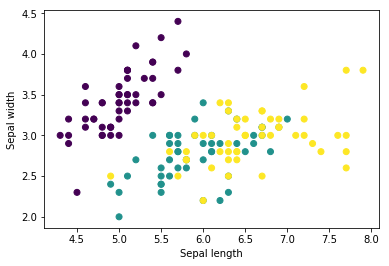

In [65]:
# convention is to rename pyplot to plt
import matplotlib.pyplot as plt

# magic command to display matplotlib plots inline
%matplotlib inline

# Plot
plt.scatter(
    iris_df["sepal_length"], # X axis is the sepal length
    iris_df["sepal_width"],  # Y axis is the sepal width
    c=iris_df["species"]     # Color is the species
)

# create labels
plt.xlabel('Sepal length')
plt.ylabel('Sepal width')

# show
plt.show()

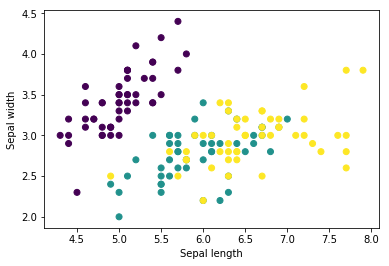

In [66]:
# Let's set some limits on the axes
plt.scatter(
    iris_df["sepal_length"], iris_df["sepal_width"],
    c=iris_df["species"],
    # cmap=plt.cm.Set1, # Set2, etc
    # alpha=0.5,
    # s=10, s=iris_df["petal_length"] * 20,
    # marker="x",
)

# name the labels, for clarity
plt.xlabel('Sepal length')
plt.ylabel('Sepal width')

# Remove ticks
#plt.xticks(())
#plt.yticks(())

plt.show()

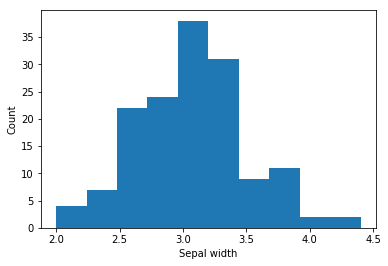

In [67]:
# Histograms:  https://matplotlib.org/api/_as_gen/matplotlib.pyplot.hist.html

plt.hist(iris_df["sepal_width"])
plt.xlabel('Sepal width')
plt.ylabel('Count')
plt.show()

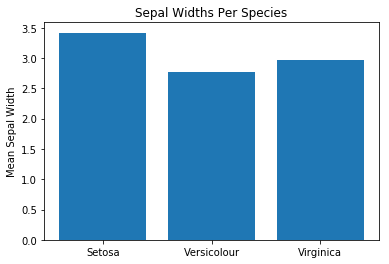

In [68]:
# Bar plots https://matplotlib.org/api/_as_gen/matplotlib.pyplot.bar.html

species = ("Setosa", "Versicolour", "Virginica")
y_pos = np.arange(len(species))
mean_widths = tuple(np.mean(iris_df.loc[iris_df["species_name"] == x, "sepal_width"]) for x in species)
 
plt.bar(y_pos, mean_widths)
plt.xticks(y_pos, species)
plt.ylabel('Mean Sepal Width')
plt.title('Sepal Widths Per Species')
 
plt.show()

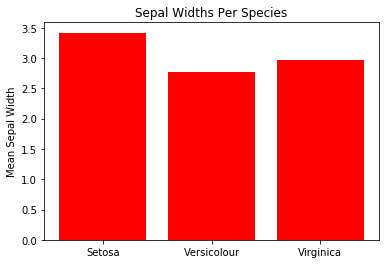

In [69]:
plt.bar(y_pos, mean_widths, color="red" )#, color=("red", "yellow", "green"), edgecolor=("blue", "green", "black")) # bottom=0, align='edge', width=(.1, .2, .3) , alpha=0.5)
# barh / yticks
plt.xticks(y_pos, species)
plt.ylabel('Mean Sepal Width')
plt.title('Sepal Widths Per Species')
 
plt.show()

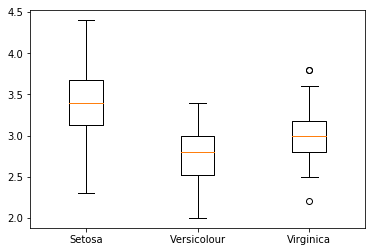

In [70]:
# Box plots:
# https://matplotlib.org/api/_as_gen/matplotlib.pyplot.boxplot.html

data_to_plot = list(iris_df.loc[iris_df["species_name"] == x, "sepal_width"] for x in species)
plt.boxplot(data_to_plot)
plt.xticks((1, 2, 3), species)
plt.show()

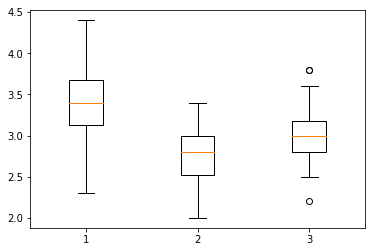

In [71]:
plt.boxplot(data_to_plot)#, notch=True, sym="x", vert=False, widths=.9, patch_artist=True, labels=species, showmeans=True)
# lie with medians, set outliers, etc
plt.show()

## Generic plot commands and subplots
* Doc: https://matplotlib.org/api/_as_gen/matplotlib.pyplot.html

### Figure
The canvas we are using.
### Subplot
Subsection of figure.
### Axes
Where we are plotting.

### plt.plot
Generic plot function that accepts x, y, and styling parameters.

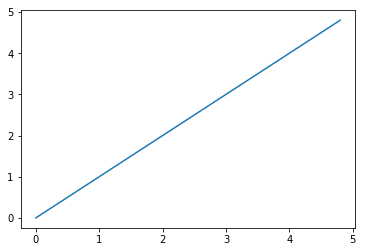

In [72]:
# evenly .2 intervals
t = np.arange(0., 5., 0.2)

# red dots
plt.plot(
    t, t, #linewidth=10, color="green",
)
plt.show()

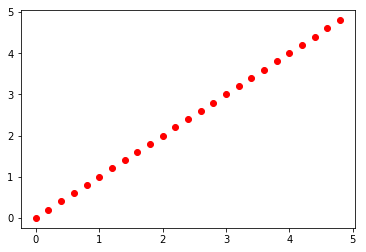

In [73]:
# evenly .2 intervals
t = np.arange(0., 5., 0.2)

# red dots
plt.plot(
    t, t, 'ro',
)
plt.show()

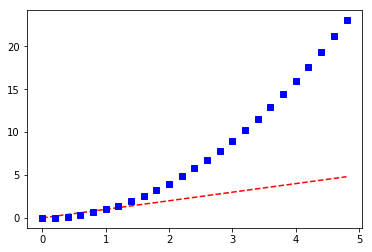

In [74]:
# red dashes, blue squares and green triangles
plt.plot(
    t, t, 'r--',
)

plt.plot(
    t, t**2, 'bs',
)

plt.show()

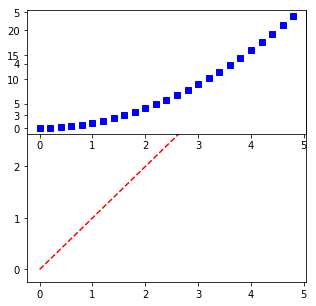

In [75]:
# subplots: https://matplotlib.org/api/_as_gen/matplotlib.pyplot.subplots.html
fig = plt.figure(figsize=(5, 5))
ax1 = fig.add_subplot(1, 1, 1)
ax2 = fig.add_subplot(2, 1, 1)

ax1.plot(
    t, t, 'r--',
)

ax2.plot(
    t, t**2, 'bs',
)

plt.show()

### Trend lines

In [89]:
z = np.polyfit(iris_df["petal_length"], iris_df["petal_width"], 1)
p = np.poly1d(z)
print(z)
print(p)

[ 0.41641913 -0.36651405]
 
0.4164 x - 0.3665


Text(0,0.5,'Petal width')

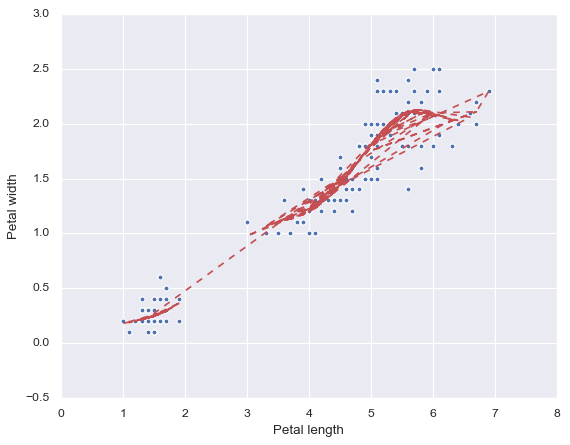

In [98]:
# PLT scatter plot (X, y, and color)
plt.scatter(iris_df["petal_length"], iris_df["petal_width"])
z = np.polyfit(iris_df["petal_length"], iris_df["petal_width"], 10)
p = np.poly1d(z)
plt.plot(iris_df["petal_length"], p(iris_df["petal_length"]),"r--")
# name the labels, for clarity
plt.xlabel('Petal length')
plt.ylabel('Petal width')

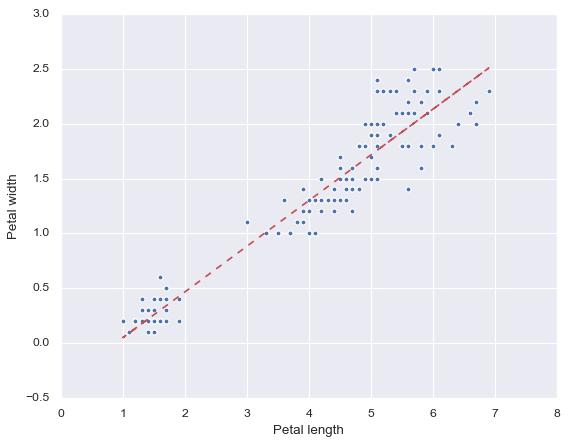

In [92]:
# PLT scatter plot (X, y, and color)
plt.scatter(iris_df["petal_length"], iris_df["petal_width"])
z = np.polyfit(iris_df["petal_length"], iris_df["petal_width"], 1)
p = np.poly1d(z)
plt.plot(iris_df["petal_length"], p(iris_df["petal_length"]),"r--")
# name the labels, for clarity
plt.xlabel('Petal length')
plt.ylabel('Petal width')
plt.savefig("x.png")

### Links
* https://matplotlib.org/index.html
* https://www.python-course.eu/matplotlib.php
* https://matplotlib.org/gallery.html

### Styles and other packages
* Matplotlib styles
* Pandas plotting based on matplotlib
* Seaborn
* Bokeh

### Pandas plotting based on matlab

* https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.plot.html



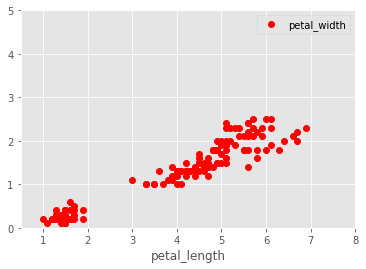

In [80]:
plt.style.use("ggplot")
plt.figure()
ax = iris_df.plot(x="petal_length", y="petal_width", style="ro")
ax.set_xlim(0.5, 8.0)
ax.set_ylim(0, 5.0)
plt.show()

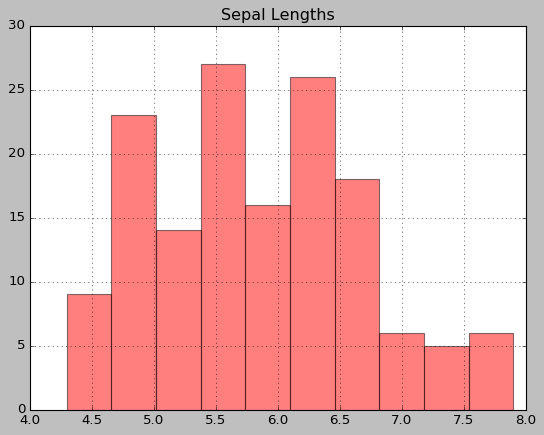

In [81]:
plt.style.use("classic")
plt.figure()
ax = iris_df.hist(column="sepal_length", color="red", alpha=0.5)
plt.title("Sepal Lengths")
plt.show()

### Seaborn
* https://seaborn.pydata.org/



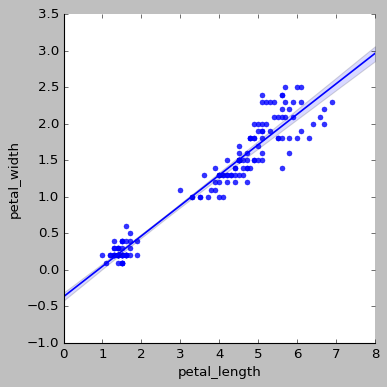

In [86]:
import seaborn as sns
sns.lmplot(x="petal_length", y="petal_width", data=iris_df)


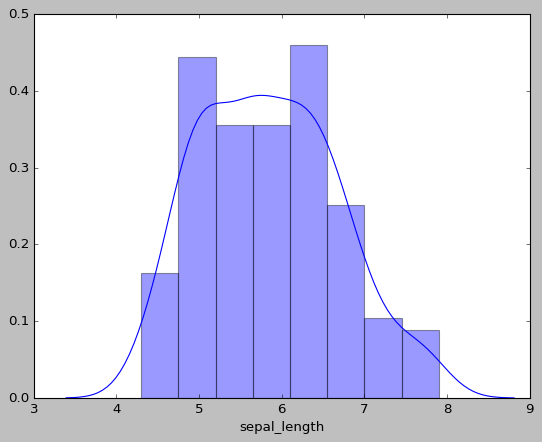

In [87]:
# import seaborn as sns
sns.distplot(iris_df["sepal_length"])

Text(3.8,4.5,'setosa')

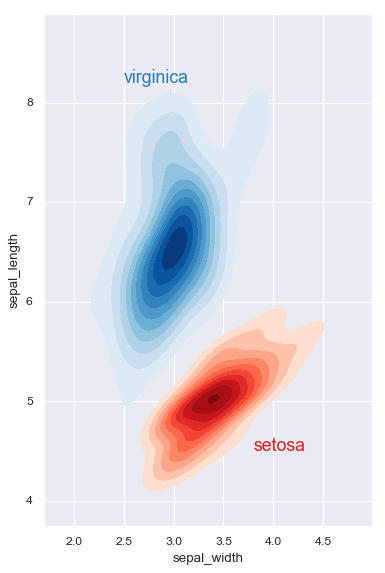

In [88]:
sns.set(style="darkgrid")
iris = sns.load_dataset("iris")

# Subset the iris dataset by species
setosa = iris.query("species == 'setosa'")
virginica = iris.query("species == 'virginica'")

# Set up the figure
f, ax = plt.subplots(figsize=(8, 8))
ax.set_aspect("equal")

# Draw the two density plots
ax = sns.kdeplot(setosa.sepal_width, setosa.sepal_length,
                 cmap="Reds", shade=True, shade_lowest=False)
ax = sns.kdeplot(virginica.sepal_width, virginica.sepal_length,
                 cmap="Blues", shade=True, shade_lowest=False)

# Add labels to the plot
red = sns.color_palette("Reds")[-2]
blue = sns.color_palette("Blues")[-2]
ax.text(2.5, 8.2, "virginica", size=16, color=blue)
ax.text(3.8, 4.5, "setosa", size=16, color=red)